In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import set_all_seeds
from tqdm import trange
import pickle

# Set the random seed for reproducibility
set_all_seeds(42)

In [12]:
# Load the data
original_data_path = 'data/ae_t2v_dimSkill300_dimUser300_tFull_dataset_V2.2.pkl'
reconstructed_data_path = 'output/denoised_long_ae_t2v_dimSkill300_dimUser300_tFull_dataset_V2.2.pkl'
inpaint_data_path = 'output/inpainted_dblp_model-steps-150_obj-pred_x0.pkl'
repaint_data_path = 'output/repaint_sanity-check_ae_t2v_dimSkill300_dimUser300_tFull_dataset_V2.2.pkl'


with open(original_data_path, 'rb') as f:
    original_data = pickle.load(f)
    
with open(reconstructed_data_path, 'rb') as f:
    reconstructed_data = pickle.load(f)
    
with open(inpaint_data_path, 'rb') as f:
    inpainting_data = pickle.load(f)
    
with open(repaint_data_path, 'rb') as f:
    repainting_data = pickle.load(f)
    
    
# Create dictionaries mapping id to concatenated record for all datasets
original_data_dict = {t[0]: np.concatenate((t[1], t[2])) for t in original_data}
reconstructed_data_dict = {t[0]: np.concatenate((t[1], t[2])) for t in reconstructed_data}
inpainting_data_dict = {t[0]: np.concatenate((t[1], t[2])) for t in inpainting_data}
repainting_data_dict = {t[0]: np.concatenate((t[1], t[2])) for t in repainting_data}

# Select records based on repainting_data ids
matching_ids = set(repainting_data_dict.keys())
original_data = np.array([original_data_dict[i] for i in matching_ids if i in original_data_dict])
reconstructed_data = np.array([reconstructed_data_dict[i] for i in matching_ids if i in reconstructed_data_dict])
inpainting_data = np.array([inpainting_data_dict[i] for i in matching_ids if i in inpainting_data_dict])
repainting_data = np.array([repainting_data_dict[i] for i in matching_ids])

100%|██████████| 600/600 [00:00<00:00, 6445.60it/s]


0.018419206


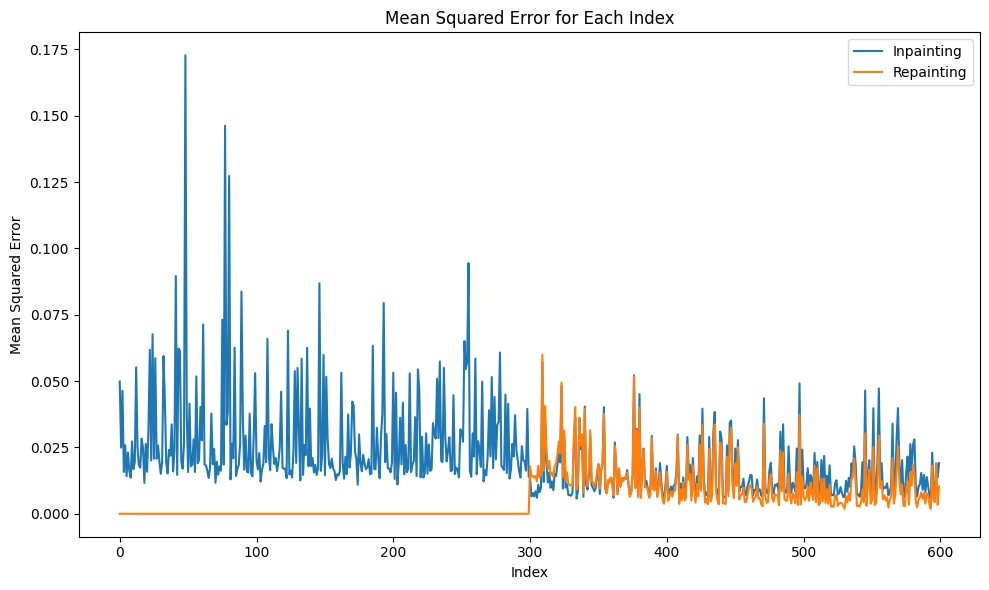

In [14]:
inpaint_mses = []
repaint_mses = []
noise_mses = []

for y_index in trange(original_data.shape[1]):
    # plt.figure(figsize=(10, 6))

    # # Create the density plots
    # sns.kdeplot(data=original_data[:, y_index], label='Original Data', fill=True, alpha=0.5)
    # sns.kdeplot(data=diffusion_data[:, y_index], label='Diffusion Data', fill=True, alpha=0.5)

    # # Remove top and right spines
    # sns.despine()

    # plt.xlabel(f"Density of Data Points for index {y_index}", fontsize=12)
    # plt.ylabel("Density", fontsize=12)
    # plt.title("Density Plot", fontsize=14)
    # plt.legend(loc='upper right')
    # plt.tight_layout()
    # plt.savefig(os.path.join('EDA_output', f'density_plot.{y_index}.png'))
    
    # plt.clf()
    
    # calculate the mse between the two distributions
    inpaint_mse = np.mean((original_data[:, y_index] - inpainting_data[:, y_index])**2)
    repaint_mse = np.mean((original_data[:, y_index] - repainting_data[:, y_index])**2)
    noise_mse = np.mean((inpainting_data[:, y_index] - repainting_data[:, y_index])**2)
    # print(f"Mean Squared Error for index {y_index}: {mse}")
    inpaint_mses.append(inpaint_mse)
    repaint_mses.append(repaint_mse)
    noise_mses.append(noise_mse)
    
print(np.mean(noise_mses))
    
plt.figure(figsize=(10, 6))
plt.plot(inpaint_mses, label='Inpainting')
plt.plot(repaint_mses, label='Repainting')
plt.xlabel("Index")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for Each Index")
plt.tight_layout()
plt.legend(loc='upper right')
# plt.savefig(os.path.join('EDA_output', 'mse_sorted_plot.png'))
plt.show()

# sorted_pairs = reversed(sorted(enumerate(mses), key=lambda x: x[1]))
# print([(i, v) for i, v in sorted_pairs])[:10]